# Machine Learning with Tree-Based Models in Python

# Classification and Regression Trees

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

## Train your first classification tree
In this exercise you'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data= pd.read_csv("data.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data_s = data[["diagnosis", "radius_mean", "concave points_mean"]]
data_s

,diagnosis,radius_mean,concave points_mean
0,M,17.99,0.14710
1,M,20.57,0.07017
2,M,19.69,0.12790
3,M,11.42,0.10520
4,M,20.29,0.10430
...,...,...,...
564,M,21.56,0.13890
565,M,20.13,0.09791
566,M,16.60,0.05302
567,M,20.60,0.15200


In [5]:
# mapping the diagnosis column
# 'M' → 1 (malignant)
# 'B' → 0 (benign)

data_s['diagnosis'] = data_s['diagnosis'].map({'B': 0, 'M': 1})

C:\Users\USER\AppData\Local\Temp\ipykernel_4712\507004401.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s['diagnosis'] = data_s['diagnosis'].map({'B': 0, 'M': 1})


In [6]:
# create a feature and target array
X = data_s.drop("diagnosis", axis=1).values
y = data_s["diagnosis"].values

SEED = 1

In [7]:
# split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = SEED)

In [8]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth= 6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

print("""You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on
the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set.""")

[0 0 0 1 0]
You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on
the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set.


## Evaluate the classification tree
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test

In [9]:
# Import the function accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Predict the test set labels and assign the obtained array to y_pred
y_pred = dt.predict(X_test)

# Compute test set accuracy(Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.)
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

print("""Not bad! Using only two features, your tree was able to achieve an accuracy of 89%!""")

Test set accuracy: 0.89
Not bad! Using only two features, your tree was able to achieve an accuracy of 89%!


## Logistic regression vs classification tree
A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the shell to learn more about this function.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise, as well as the function plot_labeled_decision_regions() are available in your workspace.

In [10]:
# import plot_decision_regions
from mlxtend.plotting import plot_decision_regions


def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

In [11]:
def plot_labeled_decision_regions(X, y, models):
    """
    Plot scatter points and decision regions of two classifiers.
    """
    # --- Validation -------------------------
    if len(models) != 2:
        raise ValueError("models must contain exactly two trained classifiers.")

    if not isinstance(X, pd.DataFrame) or X.shape[1] != 2:
        raise ValueError("X must be a pandas DataFrame with exactly TWO numerical features.")

    if not isinstance(y, pd.Series):
        raise ValueError("y must be a pandas Series.")

    # --- Plotting ---------------------------
    fig, ax = plt.subplots(1, 2, figsize=(6.0, 2.7), sharey=True)

    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, clf=model, legend=2, ax=ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])

        if i == 0:
            ax[i].set_ylabel(X.columns[1])

        ax[i].set_xlim(X.values[:, 0].min(), X.values[:, 0].max())
        ax[i].set_ylim(X.values[:, 1].min(), X.values[:, 1].max())

    plt.tight_layout()
    plt.show()

In [12]:
## Inspect the source code
import inspect
print(inspect.getsource(plot_labeled_decision_regions))

def plot_labeled_decision_regions(X, y, models):
    """
    Plot scatter points and decision regions of two classifiers.
    """
    # --- Validation -------------------------
    if len(models) != 2:
        raise ValueError("models must contain exactly two trained classifiers.")

    if not isinstance(X, pd.DataFrame) or X.shape[1] != 2:
        raise ValueError("X must be a pandas DataFrame with exactly TWO numerical features.")

    if not isinstance(y, pd.Series):
        raise ValueError("y must be a pandas Series.")

    # --- Plotting ---------------------------
    fig, ax = plt.subplots(1, 2, figsize=(6.0, 2.7), sharey=True)

    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, clf=model, legend=2, ax=ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])

        if i == 0:
            ax[i].set_ylabel(X.columns[1])

        ax[i].set_xlim(X.values[:, 0].min(), X.values[:, 0].max())
        ax[i].s

In [13]:
import pandas as pd

X_test = pd.DataFrame(X_test[:, :2], 
                      columns=["radius_mean", "concave points_mean"])

y_test = pd.Series(y_test)


In [14]:
print(type(X_test))
print(type(y_test))
print(X_test.head())


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   radius_mean  concave points_mean
0       13.770              0.06526
1       11.410              0.02623
2        8.219              0.02168
3       19.160              0.09664
4       11.260              0.05588


✅ OPTION 1 — Convert X_test to a DataFrame AND select only two columns

If you want to plot feature 0 and feature 1:

import pandas as pd

X_test_df = pd.DataFrame(X_test[:, :2], columns=['feat1', 'feat2'])
y_test_series = pd.Series(y_test)

plot_labeled_decision_regions(X_test_df, y_test_series, clfs)


This will fix the error.

✅ OPTION 2 — Choose ANY two features you want

Say you want to plot column 2 and 3 instead:

cols = [2, 3]   # pick 2 feature indices

X_test_df = pd.DataFrame(X_test[:, cols], columns=['f2', 'f3'])
y_test_series = pd.Series(y_test)

plot_labeled_decision_regions(X_test_df, y_test_series, clfs)

✅ OPTION 3 — Your model has too many features

If your dataset has many columns (like 4, 10, 30…), you MUST reduce it to two using:

⭐ PCA (recommended)
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test)

X_test_df = pd.DataFrame(X_test_2D, columns=['PC1', 'PC2'])
y_test_series = pd.Series(y_test)

plot_labeled_decision_regions(X_test_df, y_test_series, clfs)

🎉 Summary

You're getting the error because:

✔ X_test is not a DataFrame
✔ OR it has more than 2 features

💡 Fix: convert it to DataFrame and reduce to two columns.

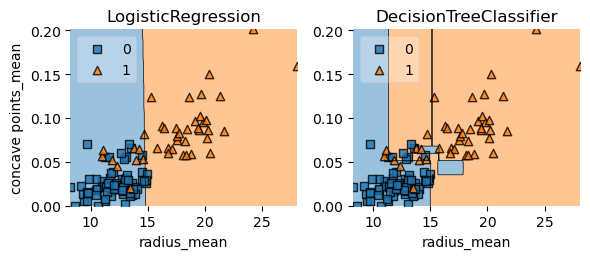

In [15]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instantiate a LogisticRegression model and assign it to logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers(Review the plot generated by plot_labeled_decision_regions())
plot_labeled_decision_regions(X_test, y_test, clfs)

Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

# Your recent learnings
When you left 23 hours ago, you worked on Classification and Regression Trees, chapter 1 of the course Machine Learning with Tree-Based Models in Python. Here is what you covered in your last lesson:

You learned about the basics of Classification and Regression Trees (CART), focusing on decision trees for classification tasks. CART models are powerful tools for supervised learning, capable of handling both classification and regression problems by learning a series of if-else questions to infer the labels or values for new data points. Specifically, you explored:

The concept of decision trees, which split the data into subsets using if-else questions about the features, allowing them to capture non-linear relationships without needing feature scaling.
How to use the Wisconsin Breast Cancer dataset to predict tumor malignancy using features like the mean radius of the tumor and the mean number of concave points, highlighting the ability of decision trees to handle complex, real-world datasets.
The process of fitting a decision tree model using scikit-learn's DecisionTreeClassifier, including splitting the dataset into training and test sets for unbiased performance evaluation, and setting the max_depth parameter to control the complexity of the model.
You practiced these concepts through exercises, where you:

Imported and instantiated a DecisionTreeClassifier with a maximum depth of 6, fitting it to the training data.
Predicted test set labels and evaluated the model's accuracy, learning how to use the accuracy_score function from scikit-learn to quantify model performance.
Compared decision tree and logistic regression models by visualizing their decision boundaries, illustrating the difference between linear and non-linear decision-making processes.

### Import DecisionTreeClassifier from sklearn.tree

from sklearn.tree import DecisionTreeClassifier

### Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6


dt = DecisionTreeClassifier(max_depth=6, random_state=1)

### Fit dt to the training set

dt.fit(X_train, y_train)

### Predict test set labels

y_pred = dt.predict(X_test)

This lesson provided a solid foundation in understanding and applying decision trees for classification tasks, setting the stage for more advanced tree-based models and techniques.

The goal of the next lesson is to explore how regression trees predict continuous outcomes and compare their structure and training process to classification trees.

# Growing a classification tree
In the video, you saw that the growth of an unconstrained classification tree followed a few simple rules. Which of the following is not one of these rules?

Possible Answers


The existence of a node depends on the state of its predecessors.


The impurity of a node can be determined using different criteria such as entropy and the gini-index.


When the information gain resulting from splitting a node is null, the node is declared as a leaf.

#### wrong answer
When an internal node is split, the split is performed in such a way so that information gain is minimized.


# Using entropy as a criterion
In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

X_train as well as the array of labels y_train are available in your workspace.

In [16]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion(Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.) and Set the information criterion to 'entropy'
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels(Predict the test set labels of dt_entropy and assign the result to y_pred)
y_pred = dt_entropy.predict(X_test)

# Evaluate the test set accuracy of dt_entropy and assign the result to accuracy_entropy.
accuracy_entropy = accuracy_score(y_test, y_pred)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In the next exercise, you'll compare the accuracy of dt_entropy to the accuracy of a another tree trained using the gini-index as the information criterion.

# Entropy vs Gini index
In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are available in your workspace.

In [17]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_gini, set 'entropy' as the information criterion(Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.) 
# and Set the information criterion to 'gini'
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_gini to predict test set labels(Predict the test set labels of dt_gini and assign the result to y_pred)
y_pred = dt_gini.predict(X_test)

# Evaluate the test set accuracy of dt_entropy and assign the result to accuracy_entropy.
accuracy_gini = accuracy_score(y_test, y_pred)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [18]:
# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')
print(""" \nNotice how the two models achieve almost the same accuracy. Most of the time, the gini index and entropy lead to the same results.
The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.""")

Accuracy achieved by using entropy: 0.886
Accuracy achieved by using the gini index: 0.921
 
Notice how the two models achieve almost the same accuracy. Most of the time, the gini index and entropy lead to the same results.
The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.


# Train your first regression tree

In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [21]:
auto_mpg = pd.read_csv("auto-mpg.csv")
auto_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [25]:
# Make a copy of the DataFrame
autompg_copy = auto_mpg.copy()
autompg_copy.drop(columns=["origin", "car name"]).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [44]:
autompg_copy.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [27]:
# create a feature and target array
X = autompg_copy.drop("mpg", axis=1).values
y = autompg_copy["mpg"].values
SEED = 2

In [29]:
# split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = SEED)

In [ ]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate a DecisionTreeRegressor dt with maximum depth 8 and min_samples_leaf set to 0.13.
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Evaluate the regression tree
In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous exercise are available in your workspace.

In [ ]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels and assign the output to y_pred
y_pred = dt.predict(X_test)

# Compute the test set MSE by calling MSE and assign the result to mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute the test set RMSE and assign it to rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

# Linear regression vs regression tree
In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

In [ ]:
# Predict test set labels using the linear regression model (lr) and assign the result to y_pred_lr
y_pred_lr = lr.predict(X_test)

# Compute the test set MSE and assign the result to mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute the test set RMSE and assign the result to rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

# The Bias-Variance Tradeoff

The bias-variance tradeoff is one of the fundamental concepts in supervised machine learning. In this chapter, you'll understand how to diagnose the problems of overfitting and underfitting. You'll also be introduced to the concept of ensembling where the predictions of several models are aggregated to produce predictions that are more robust.

# Complexity, bias and variance
In the video, you saw how the complexity of a model labeled fhat influences the bias and variance terms of its generalization error.
Which of the following correctly describes the relationship between fhat's complexity and fhats's bias and variance terms?

As the complexity of fhat increases, the bias term decreases while the variance term increases.

# Instantiate the model
In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

We have already processed the data and loaded the features matrix X and the array y in your workspace. In addition, the DecisionTreeRegressor class was imported from sklearn.tree.

In [ ]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor with max depth 4 and min_samples_leaf set to 0.26.
dt = DecisionTreeRegressor(max_depth = 4 , min_samples_leaf = 0.26, random_state=SEED)

# Evaluate the 10-fold CV error
In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree dt that you instantiated in the previous exercise.

In addition to dt, the training data including X_train and y_train are available in your workspace. We also imported cross_val_score from sklearn.model_selection.

Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

In [ ]:
# Compute dt's 10-fold cross-validated MSE by setting the scoring argument to 'neg_mean_squared_error
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv= 10, 
                       scoring = 'neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE(Compute RMSE from the obtained MSE scores)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))


# Your recent learnings
When you left 23 hours ago, you worked on The Bias-Variance Tradeoff, chapter 2 of the course Machine Learning with Tree-Based Models in Python. Here is what you covered in your last lesson:

You learned about the bias-variance tradeoff, a crucial concept in supervised machine learning that helps diagnose overfitting and underfitting issues. Here are the key points:

Generalization Error: It's the measure of how well a model performs on unseen data. Ideally, you want a model (fhat) that closely approximates the true function (f) without capturing noise in the data.

Overfitting vs. Underfitting:
Overfitting occurs when fhat fits the training data too closely, capturing noise as if it were a signal. This results in low error on training data but high error on unseen data.

Underfitting happens when fhat is too simple to capture the underlying pattern of the data, leading to high error on both training and unseen data.

Bias-Variance Tradeoff:

Bias: The difference between the average prediction of our model and the correct value. High bias can cause underfitting.

Variance: The variability of model predictions for a given data point. High variance can cause overfitting.

Balancing bias and variance is crucial for creating models that generalize well. Ideally, you want low bias and low variance to achieve the lowest generalization error.

Model Complexity: Influences bias and variance. Increasing a model's complexity (e.g., increasing the maximum tree depth in a decision tree) tends to decrease bias but increase variance, and vice versa.

You practiced identifying whether a model is overfitting or underfitting based on its bias and variance, using visual diagnostics and understanding the relationship between model complexity, bias, and variance. For example, increasing the complexity of a model (fhat) decreases the bias term while increasing the variance term:

### Increasing model complexity decreases bias but increases variance
This foundational knowledge sets the stage for more advanced machine learning concepts, such as ensembling, where multiple models are combined to improve prediction accuracy.

The goal of the next lesson is to learn how to estimate a supervised machine learning model's generalization error using cross-validation to identify and correct bias and variance issues.

# Evaluate the training error
You'll now evaluate the training set RMSE achieved by the regression tree dt that you instantiated in a previous exercise.

In addition to dt, X_train and y_train are available in your workspace.

Note that in scikit-learn, the MSE of a model can be computed as follows:

MSE_model = mean_squared_error(y_true, y_predicted)

where we use the function mean_squared_error from the metrics module and pass it the true labels y_true as a first argument, and the predicted labels from the model y_predicted as a second argument.

In [ ]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set(Predict dt's training set labels and assign the result to y_pred_train)
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (mean_squared_error(y_train, y_pred_train))**0.5

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercise.

# High bias or high variance?
In this exercise you'll diagnose whether the regression tree dt you trained in the previous exercise suffers from a bias or a variance problem.

The training set RMSE (RMSE_train) and the CV RMSE (RMSE_CV) achieved by dt are available in your workspace. In addition, we have also loaded a variable called baseline_RMSE which corresponds to the root mean-squared error achieved by the regression-tree trained with the disp feature only (it is the RMSE achieved by the regression tree trained in chapter 1, lesson 3). Here baseline_RMSE serves as the baseline RMSE above which a model is considered to be underfitting and below which the model is considered 'good enough'.

Does dt suffer from a high bias or a high variance problem?

RMSE_train = 5.15

RMSE_CV = 5.14

baseline_RMSE = 5.1

dt suffers from high bias because RMSE_CV approximately equal to RMSE_train and both scores are greater than baseline_RMSE. 
dt is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels.

# Define the ensemble
In the following set of exercises, you'll work with the Indian Liver Patient Dataset from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifier under the alias KNN are available in your workspace.

In [ ]:
# Set seed for reproducibility
SEED=1

# Instantiate a Logistic Regression classifier and assign it to lr
lr = LogisticRegression(random_state=SEED)

# Instantiate a KNN classifier that considers 27 nearest neighbors and assign it to knn.
knn = KNN(n_neighbors = 27)

# Instantiate a Decision Tree Classifier with the parameter min_samples_leaf set to 0.13 and assign it to dt.
dt = DecisionTreeClassifier(min_samples_leaf=.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

 In the next exercise, you will train these classifiers and evaluate their test set accuracy.

# Evaluate individual classifiers
In this exercise you'll evaluate the performance of the models in the list classifiers that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

The dataset is already loaded and preprocessed for you (numerical features are standardized) and it is split into 70% train and 30% test. The features matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have loaded the list classifiers from the previous exercise, as well as the function accuracy_score() from sklearn.metrics.

In [ ]:
classifiers = [('Logistic Regression', LogisticRegression(random_state=1)),
 ('K Nearest Neighbours', KNeighborsClassifier(n_neighbors=27)),
 ('Classification Tree', DecisionTreeClassifier(min_samples_leaf=0.13, random_state=1))]

In [ ]:
#Iterate over the tuples in classifiers. Use clf_name and clf as the for loop variables:
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train,y_train)    
   
    # Predict clf's test set labels and assign the results to y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test,y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

<script.py> output:

    Logistic Regression : 0.741
    
    K Nearest Neighbours : 0.701
    
    Classification Tree : 0.707

 Notice how Logistic Regression achieved the highest accuracy of 74.1%.

# Better performance with a Voting Classifier

Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

X_train, X_test,y_train, y_test, the list classifiers defined in a previous exercise, as well as the function accuracy_score from sklearn.metrics are available in your workspace.

In [ ]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier by setting the parameter estimators to classifiers and assign it to vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate vc's test set accuracy using the test set predictions y_pred
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

<script.py> output:

    Voting Classifier: 0.764

Notice how the voting classifier achieves a test set accuracy of 76.4%. This value is greater than that achieved by LogisticRegression.

# Bagging and Random Forests

Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

# Define the bagging classifier

In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate a DecisionTreeClassifier called dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate a BaggingClassifier called bc consisting of 50 trees
bc = BaggingClassifier(base_estimator= dt, n_estimators= 50, random_state=1)

# Evaluate Bagging performance

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [ ]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels(predict the test set labels and assign the result to y_pred)
y_pred = bc.predict(X_test)

# Evaluate acc_test(Determine bc's test set accuracy)
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

# Prepare the ground
In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier 

# Instantiate a DecisionTreeClassifier with min_samples_leaf set to 8.
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate a BaggingClassifier consisting of 50 trees and set oob_score to True.
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

Great! In the following exercise, you'll train bc and compare its test set accuracy to its OOB accuracy.

# OOB Score vs Test Set Score
Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [ ]:
# Fit bc to the training set and predict the test set labels and assign the results to y_pred.
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate the test set accuracy acc_test by calling accuracy_score.
acc_test = accuracy_score(y_test, y_pred)

# Evaluate bc's OOB accuracy acc_oob by extracting the attribute oob_score_ from bc.
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

<script.py> output:

Test set accuracy: 0.698, OOB accuracy: 0.702

# Train an RF regressor
In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [ ]:
# Import RandomForestRegressor from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor called rf consisting of 25 trees
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Evaluate the RF regressor
You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

In [ ]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE (Compute the test set RMSE and assign it to rmse_test)
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

You can try training a single CART on the same dataset. The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!

# Visualizing features importances
In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Call the .sort_values() method on importances and assign the result to importances_sorted.
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted(Call the .plot() method on importances_sorted and set the arguments: kind to 'barh' and color to 'lightgreen')

kind to 'barh'
color to 'lightgreen')
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!

# BOOSTING

Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors. In this chapter, you'll be introduced to the two boosting methods of AdaBoost and Gradient Boosting.

# Define the AdaBoost classifier
In the following exercises you'll revisit the Indian Liver Patient dataset which was introduced in a previous chapter. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. However, this time, you'll be training an AdaBoost ensemble to perform the classification task. In addition, given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

As a first step, you'll start by instantiating an AdaBoost classifier.

In [ ]:
# Import AdaBoostClassifier from sklearn.ensemble
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate a DecisionTreeClassifier with max_depth set to 2
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate an AdaBoostClassifier consisting of 180 trees and setting the base_estimator to dt
ada = AdaBoostClassifier(base_estimator= dt, n_estimators=180 , random_state=1)

# Train the AdaBoost classifier
Now that you've instantiated the AdaBoost classifier ada, it's time train it. You will also predict the probabilities of obtaining the positive class in the test set. This can be done as follows:

Once the classifier ada is trained, call the .predict_proba() method by passing X_test as a parameter and extract these probabilities by slicing all the values in the second column as follows:

ada.predict_proba(X_test)[:,1]

The Indian Liver dataset is processed for you and split into 80% train and 20% test. Feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the instantiated model ada from the previous exercise.

In [ ]:
# Fit ada to the training set
ada.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class in the test set.
y_pred_proba = ada.predict_proba(X_test)[:,1]

# Evaluate the AdaBoost classifier
Now that you're done training ada and predicting the probabilities of obtaining the positive class in the test set, it's time to evaluate ada's ROC AUC score. Recall that the ROC AUC score of a binary classifier can be determined using the roc_auc_score() function from sklearn.metrics.

The arrays y_test and y_pred_proba that you computed in the previous exercise are available in your workspace.

In [ ]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score(Compute ada's test set ROC AUC score, assign it to ada_roc_auc, and print it out)
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

# Your recent learnings
When you left 18 hours ago, you worked on Boosting, chapter 4 of the course Machine Learning with Tree-Based Models in Python. Here is what you covered in your last lesson:

You learned about the concept of boosting in machine learning, focusing on AdaBoost (Adaptive Boosting) and its application. Boosting is an ensemble technique that combines multiple weak learners to form a strong learner, where each weak learner attempts to correct the errors of its predecessor. Specifically, you explored:

The definition of a weak learner, which is a model slightly better than random guessing, such as a decision tree with a maximum depth of one (decision stump).
How AdaBoost works by adjusting the weights of training instances based on the errors made by the previous predictor, and assigning a coefficient (alpha) to each predictor based on its error, influencing its contribution to the final prediction.
The importance of the learning rate (eta) in AdaBoost, which shrinks the coefficient alpha of each predictor to manage the trade-off between the learning rate and the number of estimators.
You also went through practical exercises:

You imported AdaBoostClassifier and DecisionTreeClassifier from sklearn.ensemble and sklearn.tree respectively, and instantiated an AdaBoost classifier with 180 trees using a decision tree of max_depth 2 as the base estimator.
You trained the AdaBoost classifier on a training set and predicted the probabilities of obtaining the positive class in the test set.
Finally, you evaluated the AdaBoost classifier's performance using the ROC-AUC score, learning that this metric is particularly useful for imbalanced datasets.
### Import DecisionTreeClassifier and AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

### Instantiate a DecisionTreeClassifier 'dt' with max_depth=2
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

### Instantiate an AdaBoostClassifier 'ada' with 180 trees
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)
This lesson provided both a theoretical understanding of boosting, specifically AdaBoost, and practical skills in applying it to a classification problem.

The goal of the next lesson is to understand how to evaluate and improve the performance of Gradient Boosting models.

Was this useful?



# Gradient Boosting (GB)
Gradient Boosting is a popular boosting algorithm that has a proven track record of winning many machine learning competitions.
In gradient boosting, each predictor in the ensemble corrects its predecessor's error. In contrast to AdaBoost, the weights of the training instances are not tweaked. Instead, each predictor is trained using the residual errors of its predecessor as labels. In the following slides, you'll explore the technique known as gradient boosted trees where the base learner is a CART.

## Define the GB regressor
You'll now revisit the Bike Sharing Demand dataset that was introduced in the previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be using a gradient boosting regressor.

As a first step, you'll start by instantiating a gradient boosting regressor which you will train in the next exercise.

In [ ]:
# Import GradientBoostingRegressor from sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor 

# Instantiate a gradient boosting regressor by setting the parameters: max_depth to 4 and n_estimators to 200
gb = GradientBoostingRegressor(n_estimators = 200, max_depth = 4, random_state=2)

# Train the GB regressor
You'll now train the gradient boosting regressor gb that you instantiated in the previous exercise and predict test set labels.

The dataset is split into 80% train and 20% test. Feature matrices X_train and X_test, as well as the arrays y_train and y_test are available in your workspace. In addition, we have also loaded the model instance gb that you defined in the previous exercise.

In [ ]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict the test set labels and assign the result to y_pred
y_pred = gb.predict(X_test)

# Evaluate the GB regressor
Now that the test set predictions are available, you can use them to evaluate the test set Root Mean Squared Error (RMSE) of gb.

y_test and predictions y_pred are available in your workspace.

In [ ]:
# Import mean_squared_error from sklearn.metrics as MSE.
from sklearn.metrics import mean_squared_error as MSE

# Compute the test set MSE and assign it to mse_test
mse_test = MSE(y_test, y_pred)
# Compute the test set RMSE and assign it to rmse_test
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

# Gradient Boosting: Cons

Gradient boosting involves an exhaustive search procedure. Each tree in the ensemble is trained to find the best split-points and the best features. This procedure may lead to CARTs that use the same split-points and possibly the same features.

# Regression with SGB

As in the exercises from the previous lesson, you'll be working with the Bike Sharing Demand dataset. In the following set of exercises, you'll solve this bike count regression problem using stochastic gradient boosting.

In [ ]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate a Stochastic Gradient Boosting Regressor (SGBR) and set: max_depth to 4 and n_estimators to 200, subsample to 0.9, and max_features to 0.75.
sgbr = GradientBoostingRegressor(max_depth=4, 
           subsample=.9,
            max_features=.75,
            n_estimators=200,
            random_state=2)

# Train the SGB regressor

In this exercise, you'll train the SGBR sgbr instantiated in the previous exercise and predict the test set labels.

The bike sharing demand dataset is already loaded processed for you; it is split into 80% train and 20% test. The feature matrices X_train and X_test, the arrays of labels y_train and y_test, and the model instance sgbr that you defined in the previous exercise are available in your workspace.

In [ ]:
# Fit sgbr to the training set
sgbr.fit(X_train,y_train)

# Predict the test set labels and assign the results to y_pred.
y_pred = sgbr.predict(X_test)

# Evaluate the SGB regressor
You have prepared the ground to determine the test set RMSE of sgbr which you shall evaluate in this exercise.

y_pred and y_test are available in your workspace.

In [ ]:
# Import mean_squared_error as MSE from sklearn.metrics
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE and assign the result to mse_test.
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE and assign the result to rmse_test
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

# Tuning a CART's hyperparameters

To obtain a better performance, the hyperparameters of a machine learning should be tuned.

# Tree hyperparameters
In the following exercises you'll revisit the Indian Liver Patient dataset which was introduced in a previous chapter.

Your task is to tune the hyperparameters of a classification tree. Given that this dataset is imbalanced, you'll be using the ROC AUC score as a metric instead of accuracy.

We have instantiated a DecisionTreeClassifier and assigned to dt with sklearn's default hyperparameters. You can inspect the hyperparameters of dt in your console.

Answer

min_features

# Set the tree's hyperparameter grid

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune the classification tree dt and find the optimal classifier in the next exercise.

In [ ]:
# Define a grid of hyperparameters corresponding to a Python dictionary called params_dt with: the key 'max_depth' set to a list of values 2, 3, and 4 and the key 'min_samples_leaf' set to a list of values 0.12, 0.14, 0.16, 0.18

params_dt = {"max_depth":[2,3,4], 
             "min_samples_leaf":[0.12,0.14,0.16,0.18]
            }

# Search for the optimal tree

In this exercise, you'll perform grid search using 5-fold cross validation to find dt's optimal hyperparameters. Note that because grid search is an exhaustive process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the .fit() method:

grid_object.fit(X_train, y_train)

An untuned classification tree dt as well as the dictionary params_dt that you defined in the previous exercise are available in your workspace.

In [ ]:
# Import GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# Instantiate a GridSearchCV object using 5-fold CV by setting the parameters: estimator to dt, param_grid to params_dt and scoring to 'roc_auc'
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring="roc_auc",
                       cv=5,
                       n_jobs=-1)

# Evaluate the optimal tree

In this exercise, you'll evaluate the test set ROC AUC score of grid_dt's optimal model.

In order to do so, you will first determine the probability of obtaining the positive label for each test set observation. You can use the methodpredict_proba() of an sklearn classifier to compute a 2D array containing the probabilities of the negative and positive class-labels respectively along columns.

The dataset is already loaded and processed for you (numerical features are standardized); it is split into 80% train and 20% test. X_test, y_test are available in your workspace. In addition, we have also loaded the trained GridSearchCV object grid_dt that you instantiated in the previous exercise. Note that grid_dt was trained as follows:

grid_dt.fit(X_train, y_train)

In [ ]:
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the .best_estimator_ attribute from grid_dt and assign it to best_model
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of obtaining the positive class y_pred_proba
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Compute the test set ROC AUC score test_roc_auc of best_model
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

# Tuning an RF's Hyperparameters

Let's now turn to a case where we tune the hyperparameters of Random Forests which is an ensemble method.

# Random forests hyperparameters
In the following exercises, you'll be revisiting the Bike Sharing Demand dataset that was introduced in a previous chapter. Recall that your task is to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C.. For this purpose, you'll be tuning the hyperparameters of a Random Forests regressor.

We have instantiated a RandomForestRegressor called rf using sklearn's default hyperparameters. You can inspect the hyperparameters of rf in your console. Which of the following is not a hyperparameter of rf?

answers

learning_rate

# Set the hyperparameter grid of RF

In this exercise, you'll manually set the grid of hyperparameters that will be used to tune rf's hyperparameters and find the optimal regressor. For this purpose, you will be constructing a grid of hyperparameters and tune the number of estimators, the maximum number of features used when splitting each node and the minimum number of samples (or fraction) per leaf.

In [ ]:
# Define a grid of hyperparameters corresponding to a Python dictionary called params_rf with: the key 'n_estimators' set to a list of values 100, 350, 500. 
# the key 'max_features' set to a list of values 'log2', 'auto', 'sqrt'. the key 'min_samples_leaf' set to a list of values 2, 10, 30

params_rf = {"n_estimators": [100,350,500],
            "max_features": ['log2','auto','sqrt'],
            "min_samples_leaf": [2,10,30]}

# Search for the optimal forest

In this exercise, you'll perform grid search using 3-fold cross validation to find rf's optimal hyperparameters. To evaluate each model in the grid, you'll be using the negative mean squared error metric.

Note that because grid search is an exhaustive search process, it may take a lot time to train the model. Here you'll only be instantiating the GridSearchCV object without fitting it to the training set. As discussed in the video, you can train such an object similar to any scikit-learn estimator by using the .fit() method:

grid_object.fit(X_train, y_train)

The untuned random forests regressor model rf as well as the dictionary params_rf that you defined in the previous exercise are available in your workspace.

In [ ]:
# Import GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

# Instantiate a GridSearchCV object using 3-fold CV by using negative mean squared error as the scoring metric.
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring="neg_mean_squared_error",
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

# Evaluate the optimal forest
In this last exercise of the course, you'll evaluate the test set RMSE of grid_rf's optimal model.

The dataset is already loaded and processed for you and is split into 80% train and 20% test. In your environment are available X_test, y_test and the function mean_squared_error from sklearn.metrics under the alias MSE. In addition, we have also loaded the trained GridSearchCV object grid_rf that you instantiated in the previous exercise. Note that grid_rf was trained as follows:

grid_rf.fit(X_train, y_train)

In [ ]:
# Import mean_squared_error as MSE from sklearn.metrics
from sklearn.metrics import mean_squared_error as MSE

# Extract the best estimator from grid_rf and assign it to best_model
best_model = grid_rf.best_estimator_

# Predict best_model's test set labels and assign the result to y_pred
y_pred = best_model.predict(X_test)

# Compute best_model's test set RMSE.
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

# summary

Take a moment to take a look at how far you have come! 

In chapter 1, you started off by understanding and applying the CART algorithm to train decision trees or CARTs for problems involving classification and regression. 

In chapter 2, you understood what the generalization error of a supervised learning model is. In addition, you also learned how underfitting and overfitting can be diagnosed with cross-validation. Furthermore, you learned how model ensembling can produce results that are more robust than individual decision trees.

In chapter 3, you applied randomization through bootstrapping and constructed a diverse set of trees in an ensemble through bagging. You also explored how random forests introduces further randomization by sampling features at the level of each node in each tree forming the ensemble. 

Chapter 4 introduced you to boosting, an ensemble method in which predictors are trained sequentially and where each predictor tries to correct the errors made by its predecessor. Specifically, you saw how AdaBoost involved tweaking the weights of the training samples while gradient boosting involved fitting each tree using the residuals of its predecessor as labels. You also learned how subsampling instances and features can lead to a better performance through Stochastic Gradient Boosting. 

Finally, in chapter 5, you explored hyperparameter tuning through Grid Search cross-validation and you learned how important it is to get the most out of your models.